# Data preparation:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense

In [6]:
#importing the dataset
mydata=pd.read_csv('/home/Documents/Novartis/Dataset/Train.csv',sep=",")

In [7]:
#take a look at the dataset
print(mydata.shape)

(23856, 18)


In [8]:
mydata

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,CR_88991,11-JAN-02,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34,1
23852,CR_46369,05-FEB-97,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43,1
23853,CR_157556,03-APR-12,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18,1
23854,CR_103180,25-JAN-04,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43,1


In [9]:
#summarize the data
print(mydata.describe())

                X_1           X_2           X_3           X_4           X_5  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       0.483778     24.791206     24.637450      4.276744      2.455609   
std        1.439738     15.240231     15.135093      2.944672      1.963095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      7.000000      8.000000      2.000000      1.000000   
50%        0.000000     24.000000     24.000000      4.000000      3.000000   
75%        0.000000     36.000000     35.000000      6.000000      5.000000   
max        7.000000     52.000000     52.000000     10.000000      5.000000   

                X_6           X_7           X_8           X_9          X_10  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       6.154175      4.876509      0.972460      4.924128      1.244802   
std        4.471756      3.881931      1.453144    

In [10]:
mydata.info() #Checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

## Missing values imputation

In [11]:
mydata['X_12'].value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [12]:
mydata['X_12'] = mydata['X_12'].fillna(1)

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23856 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [14]:
#find the standard deviation of each column
print(mydata.std())

X_1                  1.439738
X_2                 15.240231
X_3                 15.135093
X_4                  2.944672
X_5                  1.963095
X_6                  4.471756
X_7                  3.881931
X_8                  1.453144
X_9                  1.362625
X_10                 1.119301
X_11                93.033348
X_12                 1.163264
X_13                27.597226
X_14                43.297320
X_15                 8.386834
MULTIPLE_OFFENSE     0.206800
dtype: float64


In [15]:
mydata = mydata[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE']]
#mydata['X_12'] = mydata['X_12'].fillna(1)

In [16]:
X = mydata.loc[:, mydata.columns != 'MULTIPLE_OFFENSE']
y = mydata.MULTIPLE_OFFENSE

## Over sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
print(X_ros.shape[0] - X.shape[0], 'new random picked points')
df_new = pd.concat([pd.DataFrame(X_ros), pd.DataFrame(y_ros)], axis=1)

21720 new random picked points


In [18]:
df_new['MULTIPLE_OFFENSE'].value_counts()

1    22788
0    22788
Name: MULTIPLE_OFFENSE, dtype: int64

# Data visualization:

In [19]:
import pylab as pyl #for generating plots: show()

In [20]:
import matplotlib.pyplot as plt #for tight_layout()

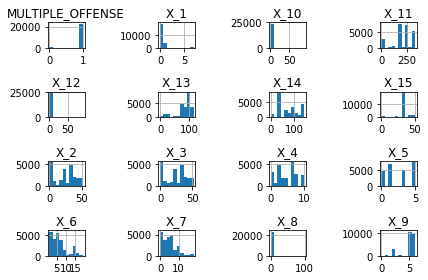

In [21]:
#plot histograms of all the columns
mydata.hist()


plt.tight_layout() #tight_layout(): adjust spacing between subplots to minimize the overlaps.
pyl.show()         #show the histograms

# Create placeholder for y-intercept

In [22]:
mydata = df_new

In [23]:
#explicitly create a placeholder for y-intercept: b0
mydata['int']=1
mydata.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,int
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,1
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,1
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,1
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,1


In [24]:
mydata.shape

(45576, 17)

In [25]:
mydata.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE', 'int'],
      dtype='object')

# Model creation

In [26]:
x_train= mydata[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
                'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15','int']]

In [27]:
y_train = mydata['MULTIPLE_OFFENSE']

In [28]:
classifier = Sequential()

In [29]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 50)

/home/asi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/home/asi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
/home/asi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/asi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/50
45576/45576 [==============================] - 5s 99us/step - loss: 0.3979 - accuracy: 0.8231
Epoch 2/50
45576/45576 [==============================] - 4s 96us/step - loss: 0.2695 - accuracy: 0.8975
Epoch 3/50
45576/45576 [==============================] - 5s 99us/step - loss: 0.2365 - accuracy: 0.9107
Epoch 4/50
45576/45576 [==============================] - 4s 97us/step - loss: 0.2236 - accuracy: 0.9139
Epoch 5/50
45576/45576 [==============================] - 4s 95us/step - loss: 0.2089 - accuracy: 0.9200
Epoch 6/50
45576/45576 [==============================] - 4s 98us/step - loss: 0.2006 - accuracy: 0.9241
Epoch 7/50
45576/45576 [==============================] - 5s 100us/step - loss: 0.1978 - accuracy: 0.9245
Epoch 8/50
45576/45576 [==============================] - 4s 97us/step - loss: 0.1938 - accuracy: 0.9272
Epoch 9/50
45576/45576 [==============================] - 4s 97us/step - loss: 0.1881 - accuracy: 0.9283
Epoch 10/50
45576/45576 [=============================

# Test data to predict the hack

In [30]:
test = pd.read_csv('/home/asi/Documents/Novartis/Dataset/Test.csv')

In [31]:
test['int']=1

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
 17  int          15903 non-null  int64  
dtypes: float64(1), int64(15), object(2)
memory usa

In [33]:
test.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'int'],
      dtype='object')

In [34]:
test['X_12'].value_counts()

1.0     10530
0.0      3346
2.0      1381
3.0       321
4.0       100
5.0        42
6.0        23
7.0        10
8.0         9
10.0        4
9.0         3
11.0        2
20.0        1
40.0        1
14.0        1
12.0        1
18.0        1
Name: X_12, dtype: int64

In [35]:
test['X_12'] = test['X_12'].fillna(1)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15903 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
 17  int          15903 non-null  int64  
dtypes: float64(1), int64(15), object(2)
memory usa

In [37]:
#test = test.dropna()

In [38]:
test['X_12'].value_counts()

1.0     10657
0.0      3346
2.0      1381
3.0       321
4.0       100
5.0        42
6.0        23
7.0        10
8.0         9
10.0        4
9.0         3
11.0        2
20.0        1
40.0        1
14.0        1
12.0        1
18.0        1
Name: X_12, dtype: int64

In [39]:
x_test =  test[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
                'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15','int']]

In [40]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [41]:
sub = pd.DataFrame()

In [42]:
sub['INCIDENT_ID'] = test['INCIDENT_ID']
sub['MULTIPLE_OFFENSE'] = y_pred

In [43]:
sub

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,True
1,CR_103520,True
2,CR_196089,True
3,CR_112195,True
4,CR_149832,True
...,...,...
15898,CR_44468,True
15899,CR_158460,True
15900,CR_115946,True
15901,CR_137663,False


In [44]:
sub['MULTIPLE_OFFENSE'] = sub['MULTIPLE_OFFENSE'].replace(True, 1)

In [45]:
sub['MULTIPLE_OFFENSE'] = sub['MULTIPLE_OFFENSE'].replace(False, 0)

In [46]:
sub

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1.0
1,CR_103520,1.0
2,CR_196089,1.0
3,CR_112195,1.0
4,CR_149832,1.0
...,...,...
15898,CR_44468,1.0
15899,CR_158460,1.0
15900,CR_115946,1.0
15901,CR_137663,0.0


In [47]:
sub.to_csv('/home/asi/Documents/Novartis/submission/sample_submission.csv', index = False)

In [48]:
sub['MULTIPLE_OFFENSE'].value_counts()

1.0    13983
0.0     1920
Name: MULTIPLE_OFFENSE, dtype: int64